In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv("./train_2017.csv", parse_dates=["transactiondate"])
train_data.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [3]:
# process bias data : for those data which is far away from our mean value
train_df = train_data
ulimit = np.percentile(train_df.logerror.values, 99.5)
llimit = np.percentile(train_df.logerror.values, 0.5)
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

/home/cqli/deep_learning/env/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/cqli/deep_learning/env/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/cqli/deep_learning/env/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


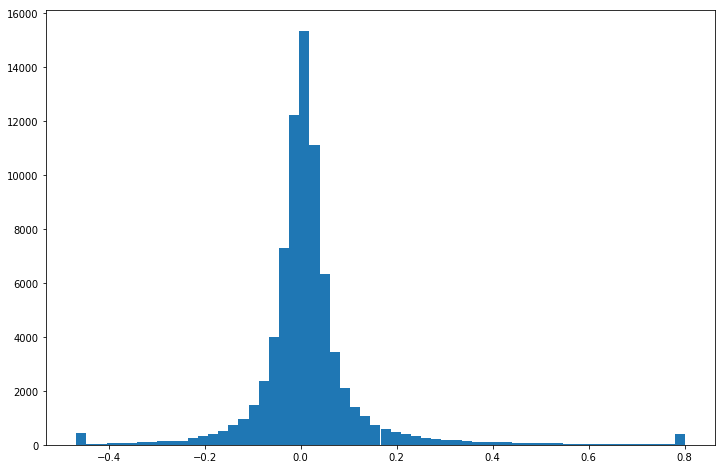

In [4]:
plt.figure(figsize=(12,8))
plt.hist(train_df.logerror.values, 60)
plt.show()

In [5]:
print(max(train_df.logerror.values))
print(min(train_df.logerror.values))
mean_val = 0
for ele in train_df.logerror.values:
    mean_val += ele
print(mean_val/len(train_df.logerror.values))
print(np.std(train_df.logerror.values))

0.8004549760705607
-0.46763610747284
0.01528947892874008
0.11976070441123617


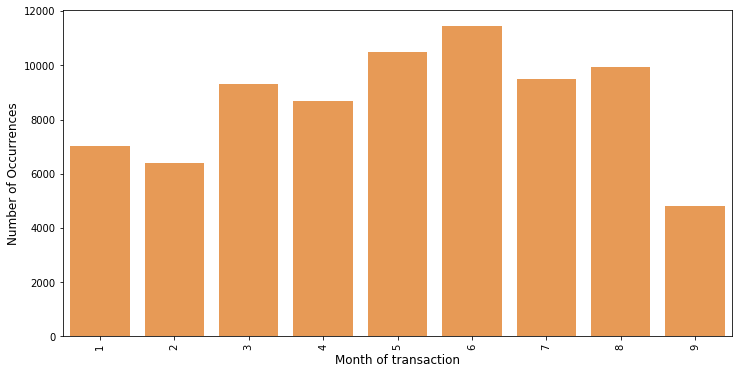

In [7]:
import seaborn as sns
color = sns.color_palette()
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [8]:
prop_df = pd.read_csv("properties_2017.csv")
prop_df.shape

/home/cqli/deep_learning/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [9]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [10]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,1,NaN,NaN,NaN,1.0,2.0,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,1,NaN,NaN,NaN,2.0,3.0,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,1,NaN,NaN,NaN,3.0,4.0,NaN,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1,1.0,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [11]:
# handle missing values in out table! Insert mean values in our table!
mean_values = train_df.mean(axis=0)
train_df.fillna(mean_values, inplace=True)

In [12]:
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,1,1.812013,7.386473,679.72,3.5,4.0,3.933333,...,1.434286,1,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,14.088276,6.059063e+13
1,17052889,0.055619,2017-01-01,1,1.812013,7.386473,679.72,1.0,2.0,3.933333,...,1.000000,1,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,14.088276,6.111001e+13
2,14186244,0.005383,2017-01-01,1,1.812013,7.386473,679.72,2.0,3.0,3.933333,...,1.000000,1,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,14.088276,6.059022e+13
3,12177905,-0.103410,2017-01-01,1,1.812013,7.386473,679.72,3.0,4.0,3.933333,...,1.434286,1,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,14.088276,6.037300e+13
4,10887214,0.006940,2017-01-01,1,1.000000,7.386473,679.72,3.0,3.0,3.933333,...,1.434286,1,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,14.088276,6.037124e+13


In [13]:
import math
columns = []
for col in train_df.columns:
    if col != 'logerror' and train_df[col].dtype == 'float64':
        columns.append(col)

correlations = []
for col_name in columns:
    correlations.append(np.corrcoef(train_df[col_name].values, train_df.logerror.values)[0,1])

values = []
labels = []
for i in range(len(columns)):
    if math.isnan(correlations[i]) == False:
        labels.append(columns[i])
        values.append(correlations[i])

/home/cqli/deep_learning/env/lib/python3.5/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/cqli/deep_learning/env/lib/python3.5/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [14]:
class Node(object):
    def __init__(self, x, y):
        self.value = x
        self.col_name = y
nodes = []
for i in range(len(values)):
    t = Node(values[i], labels[i])
    nodes.append(t)
nodes.sort(key=lambda x: abs(x.value), reverse = True)
for node in nodes:
    print("{} : {}".format(node.col_name, node.value))

finishedsquarefeet12 : 0.04458437654847187
calculatedfinishedsquarefeet : 0.04009675106018118
bedroomcnt : 0.033205392488781
calculatedbathnbr : 0.028883533452357654
bathroomcnt : 0.027065219063879202
fullbathcnt : 0.026391321986994426
taxdelinquencyyear : -0.023927079111269477
garagetotalsqft : 0.020214390195099314
roomcnt : 0.01702950911937327
garagecarcnt : 0.016021870040539527
regionidcounty : -0.015008738361252997
basementsqft : 0.013696666311620843
buildingqualitytypeid : -0.013259950606916796
buildingclasstypeid : 0.012809585584749044
finishedsquarefeet15 : -0.01088050193216351
longitude : 0.010628875463839631
fips : 0.010354330104257091
rawcensustractandblock : 0.010272907212325905
threequarterbathnbr : 0.009850234901192348
lotsizesquarefeet : 0.00940782043986878
yardbuildingsqft17 : -0.008104927321023093
latitude : -0.007885735359133603
finishedsquarefeet50 : -0.006864095251253614
censustractandblock : 0.0066515306973398336
airconditioningtypeid : 0.006074959834760535
property

In [18]:
labels = []
values = []
for node in nodes:
    labels.append(node.col_name)
    values.append(node.value)
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(30,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient values")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.savefig("hhh.png")

### let's define train our model using gradient boosting regression tree algorithms
### first of all, we can just consider all of features to fit our model, even though the training took long time, but it is a good start for exploration
### first of all, we need to divide the data set into trainning data set and test data set

In [12]:
train_y = train_df['logerror'].values
select_columns = []
for node in nodes:
    select_columns.append(node.col_name)
train_df = train_df[select_columns]
y_train = train_y[int(len(train_df)*0.1): len(train_df)]
X_train = train_df[int(len(train_df)*0.1): len(train_df)]

(test_df, test_y) = (train_df[0:int(len(train_df)*0.1)], train_y[0:int(len(train_df)*0.1)])
y_test = test_y
X_test = test_df

### we can train our model based on gradient boosting algorithms

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=20, random_state=0, loss='ls')
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=20,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [14]:
# mean squre result of above model:
print(mean_squared_error(y_test, model.predict(X_test)))

0.01617276470299638


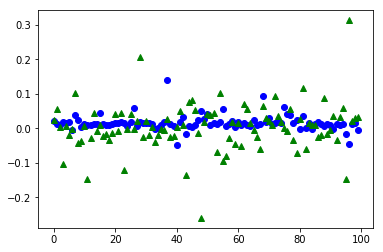

In [15]:
y_test_predicts = model.predict(X_test)[0:100]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_test[0:100], 'g^')
plt.show()

In [16]:
# we can train our model to adjust parameters of parameters, since we need to increase variance of our model 
model = GradientBoostingRegressor(n_estimators = 20, learning_rate=0.01, max_depth=35, random_state=0, loss='ls')
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=35,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=20,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
# mean squre result of above model:
print(mean_squared_error(y_test, model.predict(X_test)))

0.016190550563331598


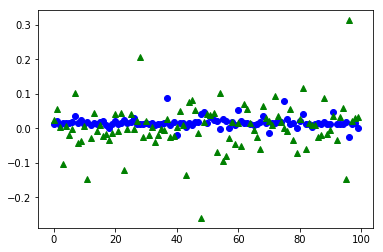

In [18]:
y_test_predicts = model.predict(X_test)[0:100]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_test[0:100], 'g^')
plt.show()

In [22]:
# now, let's think about this question, since we have studies covariance matrix with respect to features and logerror
# so, we can select the most significant features who have largest covariances
nodes.sort(key=lambda x: x.value, reverse = True)
for node in nodes:
    print("{} : {}".format(node.col_name, node.value))

finishedsquarefeet12 : 0.04458437654847187
calculatedfinishedsquarefeet : 0.04009675106018118
bedroomcnt : 0.033205392488781
calculatedbathnbr : 0.028883533452357654
bathroomcnt : 0.027065219063879202
fullbathcnt : 0.026391321986994426
garagetotalsqft : 0.020214390195099314
roomcnt : 0.01702950911937327
garagecarcnt : 0.016021870040539527
basementsqft : 0.013696666311620843
buildingclasstypeid : 0.012809585584749044
longitude : 0.010628875463839631
fips : 0.010354330104257091
rawcensustractandblock : 0.010272907212325905
threequarterbathnbr : 0.009850234901192348
lotsizesquarefeet : 0.00940782043986878
censustractandblock : 0.0066515306973398336
airconditioningtypeid : 0.006074959834760535
fireplacecnt : 0.005475921941755078
structuretaxvaluedollarcnt : 0.005270972792120717
yearbuilt : 0.004698354293916106
numberofstories : 0.003367569365510138
finishedsquarefeet6 : 0.001701401154290321
poolsizesum : 0.0010256658432084835
taxvaluedollarcnt : 0.0005296782823924165
unitcnt : 7.4515299298

In [23]:
select_columns_features = []
index = 0
for node in nodes:
    if index <= 12:
        select_columns_features.append(node.col_name)
    index += 1
    
select_columns_features

['finishedsquarefeet12',
 'calculatedfinishedsquarefeet',
 'bedroomcnt',
 'calculatedbathnbr',
 'bathroomcnt',
 'fullbathcnt',
 'garagetotalsqft',
 'roomcnt',
 'garagecarcnt',
 'basementsqft',
 'buildingclasstypeid',
 'longitude',
 'fips']

In [27]:
train_data_df = train_df[select_columns_features]
y_train = train_y[int(len(train_df)*0.1): len(train_df)]
X_train = train_data_df[int(len(train_df)*0.1): len(train_df)]

(test_df, test_y) = (train_data_df[0:int(len(train_df)*0.1)], train_y[0:int(len(train_df)*0.1)])
y_test = test_y
X_test = test_df
train_data_df.head()

,finishedsquarefeet12,calculatedfinishedsquarefeet,bedroomcnt,calculatedbathnbr,bathroomcnt,fullbathcnt,garagetotalsqft,roomcnt,garagecarcnt,basementsqft,buildingclasstypeid,longitude,fips
0,3100.0,3100.0,4.0,3.5,3.5,3.0,633.000000,0.0,2.000000,679.72,3.933333,-117869207.0,6059.0
1,1465.0,1465.0,2.0,1.0,1.0,1.0,0.000000,5.0,1.000000,679.72,3.933333,-119281531.0,6111.0
2,1243.0,1243.0,3.0,2.0,2.0,2.0,440.000000,6.0,2.000000,679.72,3.933333,-117823170.0,6059.0
3,2376.0,2376.0,4.0,3.0,3.0,3.0,350.047061,0.0,1.815282,679.72,3.933333,-118240722.0,6037.0
4,1312.0,1312.0,3.0,3.0,3.0,3.0,350.047061,0.0,1.815282,679.72,3.933333,-118414640.0,6037.0


In [29]:
model = GradientBoostingRegressor(n_estimators = 20, learning_rate=0.01, max_depth=35, random_state=0, loss='ls')
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=35,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=20,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
print(mean_squared_error(y_test, model.predict(X_test)))

0.016185524925445914


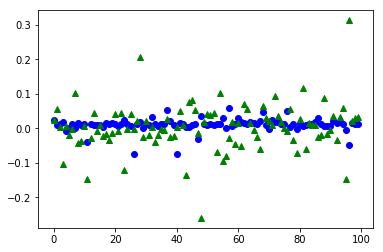

In [31]:
y_test_predicts = model.predict(X_test)[0:100]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_test[0:100], 'g^')
plt.show()

In [39]:
model = GradientBoostingRegressor(n_estimators = 5, learning_rate=0.1, max_depth=35, random_state=0, loss='ls')
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=35, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
print(mean_squared_error(y_test, model.predict(X_test)))

0.017130372340407155


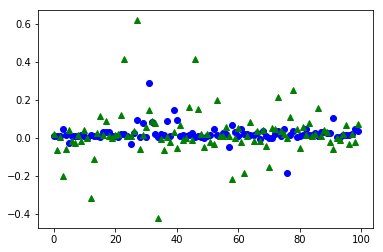

In [41]:
y_test_predicts = model.predict(X_test)[100:200]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_test[100:200], 'g^')
plt.show()

In [43]:
# Now we found that even we consider those features who have largest variance, we cannot get better result
# so we can add more features which have largest absolute covariace with logerror
nodes.sort(key=lambda x: abs(x.value), reverse = True)
for node in nodes:
    print("{} : {}".format(node.col_name, node.value))

finishedsquarefeet12 : 0.04458437654847187
calculatedfinishedsquarefeet : 0.04009675106018118
bedroomcnt : 0.033205392488781
calculatedbathnbr : 0.028883533452357654
bathroomcnt : 0.027065219063879202
fullbathcnt : 0.026391321986994426
taxdelinquencyyear : -0.023927079111269477
garagetotalsqft : 0.020214390195099314
roomcnt : 0.01702950911937327
garagecarcnt : 0.016021870040539527
regionidcounty : -0.015008738361252997
basementsqft : 0.013696666311620843
buildingqualitytypeid : -0.013259950606916796
buildingclasstypeid : 0.012809585584749044
finishedsquarefeet15 : -0.01088050193216351
longitude : 0.010628875463839631
fips : 0.010354330104257091
rawcensustractandblock : 0.010272907212325905
threequarterbathnbr : 0.009850234901192348
lotsizesquarefeet : 0.00940782043986878
yardbuildingsqft17 : -0.008104927321023093
latitude : -0.007885735359133603
finishedsquarefeet50 : -0.006864095251253614
censustractandblock : 0.0066515306973398336
airconditioningtypeid : 0.006074959834760535
property

In [44]:
select_columns_features = []
index = 0
for node in nodes:
    if index <= 18:
        select_columns_features.append(node.col_name)
    index += 1
    
select_columns_features

['finishedsquarefeet12',
 'calculatedfinishedsquarefeet',
 'bedroomcnt',
 'calculatedbathnbr',
 'bathroomcnt',
 'fullbathcnt',
 'taxdelinquencyyear',
 'garagetotalsqft',
 'roomcnt',
 'garagecarcnt',
 'regionidcounty',
 'basementsqft',
 'buildingqualitytypeid',
 'buildingclasstypeid',
 'finishedsquarefeet15',
 'longitude',
 'fips',
 'rawcensustractandblock',
 'threequarterbathnbr']

In [45]:
train_data_df = train_df[select_columns_features]
y_train = train_y[int(len(train_df)*0.1): len(train_df)]
X_train = train_data_df[int(len(train_df)*0.1): len(train_df)]

(test_df, test_y) = (train_data_df[0:int(len(train_df)*0.1)], train_y[0:int(len(train_df)*0.1)])
y_test = test_y
X_test = test_df
train_data_df.head()

,finishedsquarefeet12,calculatedfinishedsquarefeet,bedroomcnt,calculatedbathnbr,bathroomcnt,fullbathcnt,taxdelinquencyyear,garagetotalsqft,roomcnt,garagecarcnt,regionidcounty,basementsqft,buildingqualitytypeid,buildingclasstypeid,finishedsquarefeet15,longitude,fips,rawcensustractandblock,threequarterbathnbr
0,3100.0,3100.0,4.0,3.5,3.5,3.0,14.088276,633.000000,0.0,2.000000,1286.0,679.72,6.533779,3.933333,2354.491245,-117869207.0,6059.0,6.059063e+07,1.000000
1,1465.0,1465.0,2.0,1.0,1.0,1.0,14.088276,0.000000,5.0,1.000000,2061.0,679.72,6.533779,3.933333,2354.491245,-119281531.0,6111.0,6.111001e+07,1.009598
2,1243.0,1243.0,3.0,2.0,2.0,2.0,14.088276,440.000000,6.0,2.000000,1286.0,679.72,6.533779,3.933333,2354.491245,-117823170.0,6059.0,6.059022e+07,1.009598
3,2376.0,2376.0,4.0,3.0,3.0,3.0,14.088276,350.047061,0.0,1.815282,3101.0,679.72,8.000000,3.933333,2354.491245,-118240722.0,6037.0,6.037300e+07,1.009598
4,1312.0,1312.0,3.0,3.0,3.0,3.0,14.088276,350.047061,0.0,1.815282,3101.0,679.72,8.000000,3.933333,2354.491245,-118414640.0,6037.0,6.037124e+07,1.009598


In [58]:
model = GradientBoostingRegressor(n_estimators = 10, learning_rate=0.01, max_depth=20, random_state=0, loss='ls')
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=20,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10,
             n_iter_no_change=None, presort='auto', random_state=0,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [59]:
print(mean_squared_error(y_test, model.predict(X_test)))

0.01599242456077152


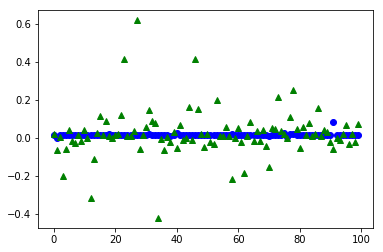

In [60]:
y_test_predicts = model.predict(X_test)[100:200]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_test[100:200], 'g^')
plt.show()

In [65]:
# looks like gradient boosting tree regression should work in this case, but we need to confirm our result using more models!
# we need to construct a new model to study this algorithm， how about adaboost plus decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                          n_estimators=300, random_state=1)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=1)

In [66]:
print(mean_squared_error(y_test, regr_1.predict(X_test)))
print(mean_squared_error(y_test, regr_2.predict(X_test)))

0.021273486707590866
0.016951678638327763


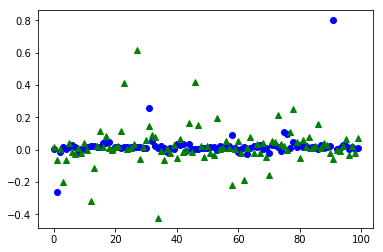

In [67]:
y_train_predicts = regr_1.predict(X_train)[100:200]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_train[100:200], 'g^')
plt.show()

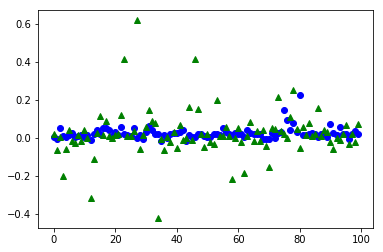

In [68]:
y_test_predicts = regr_2.predict(X_test)[100:200]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_test[100:200], 'g^')
plt.show()

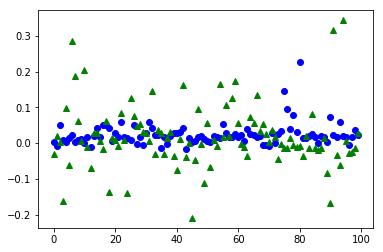

In [70]:
y_train_predicts = regr_2.predict(X_train)[100:200]
plt.figure(1)
plt.plot(np.arange(100), y_test_predicts, 'bo', np.arange(100), y_train[100:200], 'g^')
plt.show()

In [82]:
for node in nodes:
    print("{} : {}".format(node.col_name, node.value))

finishedsquarefeet12 : 0.04458437654847187
calculatedfinishedsquarefeet : 0.04009675106018118
bedroomcnt : 0.033205392488781
calculatedbathnbr : 0.028883533452357654
bathroomcnt : 0.027065219063879202
fullbathcnt : 0.026391321986994426
taxdelinquencyyear : -0.023927079111269477
garagetotalsqft : 0.020214390195099314
roomcnt : 0.01702950911937327
garagecarcnt : 0.016021870040539527
regionidcounty : -0.015008738361252997
basementsqft : 0.013696666311620843
buildingqualitytypeid : -0.013259950606916796
buildingclasstypeid : 0.012809585584749044
finishedsquarefeet15 : -0.01088050193216351
longitude : 0.010628875463839631
fips : 0.010354330104257091
rawcensustractandblock : 0.010272907212325905
threequarterbathnbr : 0.009850234901192348
lotsizesquarefeet : 0.00940782043986878
yardbuildingsqft17 : -0.008104927321023093
latitude : -0.007885735359133603
finishedsquarefeet50 : -0.006864095251253614
censustractandblock : 0.0066515306973398336
airconditioningtypeid : 0.006074959834760535
property